# Gradient Boosting

This notebook shows the Gradient Boosting model for bank marketing data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import Timer, plot_learning_curve

In [3]:
df = pd.read_csv("bank-additional-clean.csv")

In [4]:
df.head()

,age,default,housing,loan,month,day_of_week,duration,campaign,pdays,previous,...,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,40,0,1,0,7,2,180,1,999,1,...,0,0,0,1,0,1,0,1,0,0
1,49,0,0,0,4,1,464,2,999,0,...,0,0,0,1,0,0,1,0,1,0
2,41,0,1,0,4,0,307,1,999,0,...,1,0,0,0,0,0,1,0,1,0
3,54,0,1,0,4,1,111,2,999,0,...,1,0,0,0,0,0,1,0,1,0
4,57,0,1,1,0,1,45,1,999,1,...,0,0,0,0,1,1,0,1,0,0


### Modelling

1. Split dataset into training and test set

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
# Set up timer
t = Timer()

## Gradient Boosting

1. Default Gradient Boosting model

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score,roc_curve,roc_auc_score
from sklearn.metrics import recall_score, precision_score, f1_score

t.start()
gbc_base = GradientBoostingClassifier(
    random_state=0, 
    n_estimators=200,
    learning_rate=0.1, 
    max_depth=4
)
gbc_base.fit(X_train, y_train)
y_pred_gbc_base_train = gbc_base.predict(X_train)
y_pred_gbc_base_test = gbc_base.predict(X_test)
t.stop()

accuracy_train = accuracy_score(y_train, y_pred_gbc_base_train)
precision_train = precision_score(y_train, y_pred_gbc_base_train)
recall_train = recall_score(y_train, y_pred_gbc_base_train)
f1_train = f1_score(y_train, y_pred_gbc_base_train)
roc_auc_train = roc_auc_score(y_train, y_pred_gbc_base_train)

accuracy_test = accuracy_score(y_test, y_pred_gbc_base_test)
precision_test = precision_score(y_test, y_pred_gbc_base_test)
recall_test = recall_score(y_test, y_pred_gbc_base_test)
f1_test = f1_score(y_test, y_pred_gbc_base_test)
roc_auc_test = roc_auc_score(y_test, y_pred_gbc_base_test)

print(f"Train Accuracy of GBC: {accuracy_train:.3f}")
print(f"Train Precision of GBC: {precision_train:.3f}")
print(f"Train Recall of GBC: {recall_train:.3f}")
print(f"Train F1 of GBC: {f1_train:.3f}")
print(f"Train ROC of GBC: {roc_auc_train:.3f}")
print("---")
print(f"Test Accuracy of GBC: {accuracy_test:.3f}")
print(f"Test Precision of GBC: {precision_test:.3f}")
print(f"Test Recall of GBC: {recall_test:.3f}")
print(f"Test F1 of GBC: {f1_test:.3f}")
print(f"Test ROC of GBC: {roc_auc_test:.3f}")

Elapsed time: 3.3306 seconds
Train Accuracy of GBC: 0.918
Train Precision of GBC: 0.830
Train Recall of GBC: 0.841
Train F1 of GBC: 0.835
Train ROC of GBC: 0.892
---
Test Accuracy of GBC: 0.877
Test Precision of GBC: 0.734
Test Recall of GBC: 0.747
Test F1 of GBC: 0.740
Test ROC of GBC: 0.832


Use Cross Validation for default model

In [8]:
from sklearn.model_selection import cross_validate,cross_val_predict

t.start()
gbc_base_res_base = cross_validate(
      estimator=gbc_base,
      X=X_train,
      y=y_train,
      cv=5,
      scoring=['accuracy', 'precision', 'recall', 'f1'],
      return_train_score=True
      )
t.stop()

Elapsed time: 13.6557 seconds


Collect mean of all scores

In [9]:
training_metrics = ["train_accuracy", "train_precision", "train_recall", "train_f1"]
testing_metrics = ["test_accuracy", "test_precision", "test_recall", "test_f1"]
for m in training_metrics:
    print(f"{m}: {np.mean(gbc_base_res_base[m]):.3f}")
print("----")
for m in testing_metrics:
    print(f"{m}: {np.mean(gbc_base_res_base[m]):.3f}")

train_accuracy: 0.925
train_precision: 0.844
train_recall: 0.856
train_f1: 0.850
----
test_accuracy: 0.877
test_precision: 0.741
test_recall: 0.773
test_f1: 0.757


Plot learning curve of default GBC

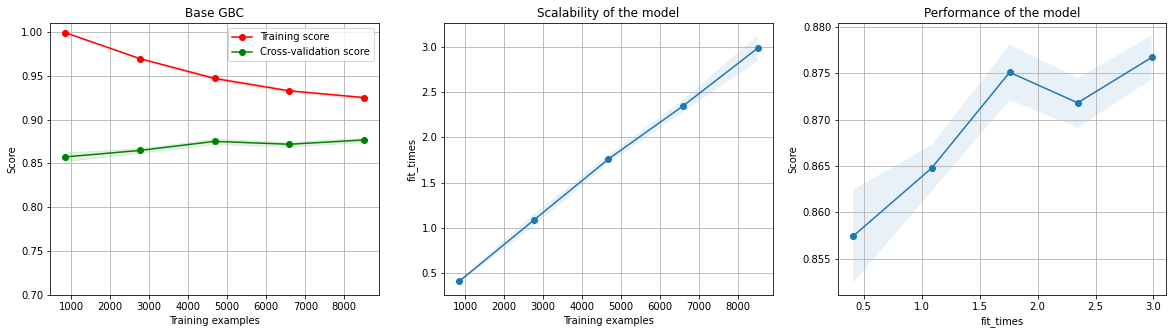

In [10]:
title = "Base GBC"
plot_learning_curve(
    gbc_base, title, X_train, y_train, ylim=(0.7, 1.01), cv=5, n_jobs=4
)

plt.show()

In [11]:
y_pred_gbc_base_train = cross_val_predict(gbc_base, X_train, y_train, cv=5)
y_pred_gbc_base_test = cross_val_predict(gbc_base, X_test, y_test, cv=5)

accuracy_train = accuracy_score(y_train, y_pred_gbc_base_train)
precision_train = precision_score(y_train, y_pred_gbc_base_train)
recall_train = recall_score(y_train, y_pred_gbc_base_train)
f1_train = f1_score(y_train, y_pred_gbc_base_train)
roc_auc_train = roc_auc_score(y_train, y_pred_gbc_base_train)

accuracy_test = accuracy_score(y_test, y_pred_gbc_base_test)
precision_test = precision_score(y_test, y_pred_gbc_base_test)
recall_test = recall_score(y_test, y_pred_gbc_base_test)
f1_test = f1_score(y_test, y_pred_gbc_base_test)
roc_auc_test = roc_auc_score(y_test, y_pred_gbc_base_test)

print(f"Train Accuracy of GBC: {accuracy_train:.3f}")
print(f"Train Precision of GBC: {precision_train:.3f}")
print(f"Train Recall of GBC: {recall_train:.3f}")
print(f"Train F1 of GBC: {f1_train:.3f}")
print(f"Train ROC of GBC: {roc_auc_train:.3f}")
print("---")
print(f"Test Accuracy of GBC: {accuracy_test:.3f}")
print(f"Test Precision of GBC: {precision_test:.3f}")
print(f"Test Recall of GBC: {recall_test:.3f}")
print(f"Test F1 of GBC: {f1_test:.3f}")
print(f"Test ROC of GBC: {roc_auc_test:.3f}")

Train Accuracy of GBC: 0.877
Train Precision of GBC: 0.741
Train Recall of GBC: 0.773
Train F1 of GBC: 0.757
Train ROC of GBC: 0.842
---
Test Accuracy of GBC: 0.871
Test Precision of GBC: 0.730
Test Recall of GBC: 0.715
Test F1 of GBC: 0.722
Test ROC of GBC: 0.817


Perform pruning

I will try to tune the other hyperparameters to prune the model and score higher for the accuracy metrics

In [138]:
from sklearn.model_selection import GridSearchCV

parameter_space = {
    "max_depth": [1, 2, 3],
    "learning_rate": [0.001, 0.01, 0.1, 1],
    "n_estimators": [25, 50, 75, 100, 125]
}
gbc = GradientBoostingClassifier(random_state=0)
gbc_gs = GridSearchCV(gbc, parameter_space, n_jobs=-1, cv=5)
gbc_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'max_depth': [1, 2, 3],
                         'n_estimators': [25, 50, 75, 100, 125]})

In [139]:
cv_results = pd.DataFrame(gbc_gs.cv_results_)

In [140]:
cv_results.sort_values(by="mean_test_score", ascending=False).head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
43,1.429254,0.074143,0.004987,0.001255,0.1,3,100,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.878588,0.882353,0.873412,0.877176,0.878588,0.878024,0.002876,1
44,1.809495,0.031061,0.005757,0.001813,0.1,3,125,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.880471,0.880471,0.874353,0.876235,0.878588,0.878024,0.002407,2
42,1.077164,0.034328,0.005933,0.001910,0.1,3,75,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.880000,0.881882,0.872941,0.875294,0.879529,0.877929,0.003295,3


In [142]:
cv_results.sort_values(by="mean_test_score", ascending=False).head(3)[["param_learning_rate", "param_max_depth", "param_n_estimators", "mean_test_score", "std_test_score"]]

,param_learning_rate,param_max_depth,param_n_estimators,mean_test_score,std_test_score
43,0.1,3,100,0.878024,0.002876
44,0.1,3,125,0.878024,0.002407
42,0.1,3,75,0.877929,0.003295


It seems that max_depth = 3, learning_rate = 0.1 and 100 estimators provided the best training scores. We will train the model again with these settings

Advanced model

In [12]:
t.start()
gbc_adv = GradientBoostingClassifier( 
    random_state=0, 
    n_estimators=100, 
    learning_rate=0.1,
    max_depth=3
)
gbc_adv.fit(X_train, y_train)
y_pred_gbc_adv_train = gbc_adv.predict(X_train)
y_pred_gbc_adv_test = gbc_adv.predict(X_test)
t.stop()

accuracy_train = accuracy_score(y_train, y_pred_gbc_adv_train)
precision_train = precision_score(y_train, y_pred_gbc_adv_train)
recall_train = recall_score(y_train, y_pred_gbc_adv_train)
f1_train = f1_score(y_train, y_pred_gbc_adv_train)
roc_train = roc_auc_score(y_train, y_pred_gbc_adv_train)

accuracy_test = accuracy_score(y_test, y_pred_gbc_adv_test)
precision_test = precision_score(y_test, y_pred_gbc_adv_test)
recall_test = recall_score(y_test, y_pred_gbc_adv_test)
f1_test = f1_score(y_test, y_pred_gbc_adv_test)
roc_test = roc_auc_score(y_test, y_pred_gbc_adv_test)

print(f"Train Accuracy of Adv GBC: {accuracy_train:.3f}")
print(f"Train Precision of Adv GBC: {precision_train:.3f}")
print(f"Train Recall of Adv GBC: {recall_train:.3f}")
print(f"Train F1 of Adv GBC: {f1_train:.3f}")
print(f"Train ROC of Adv GBC: {roc_train:.3f}")
print("---")
print(f"Test Accuracy of Adv GBC: {accuracy_test:.3f}")
print(f"Test Precision of Adv GBC: {precision_test:.3f}")
print(f"Test Recall of Adv GBC: {recall_test:.3f}")
print(f"Test F1 of Adv GBC: {f1_test:.3f}")
print(f"Test ROC of Adv GBC: {roc_test:.3f}")

Elapsed time: 1.2382 seconds
Train Accuracy of Adv GBC: 0.890
Train Precision of Adv GBC: 0.766
Train Recall of Adv GBC: 0.803
Train F1 of Adv GBC: 0.784
Train ROC of Adv GBC: 0.861
---
Test Accuracy of Adv GBC: 0.878
Test Precision of Adv GBC: 0.730
Test Recall of Adv GBC: 0.762
Test F1 of Adv GBC: 0.746
Test ROC of Adv GBC: 0.838


In [13]:
t.start()
gbc_adv_res = cross_validate(
      estimator=gbc_adv,
      X=X_train,
      y=y_train,
      cv=5,
      scoring=['accuracy', 'precision', 'recall', 'f1'],
      return_train_score=True
      )
t.stop()

Elapsed time: 4.9564 seconds


In [14]:
for m in training_metrics:
    print(f"{m}: {np.mean(gbc_adv_res[m]):.3f}")
print("----")
for m in testing_metrics:
    print(f"{m}: {np.mean(gbc_adv_res[m]):.3f}")

train_accuracy: 0.891
train_precision: 0.768
train_recall: 0.805
train_f1: 0.786
----
test_accuracy: 0.878
test_precision: 0.741
test_recall: 0.781
test_f1: 0.760


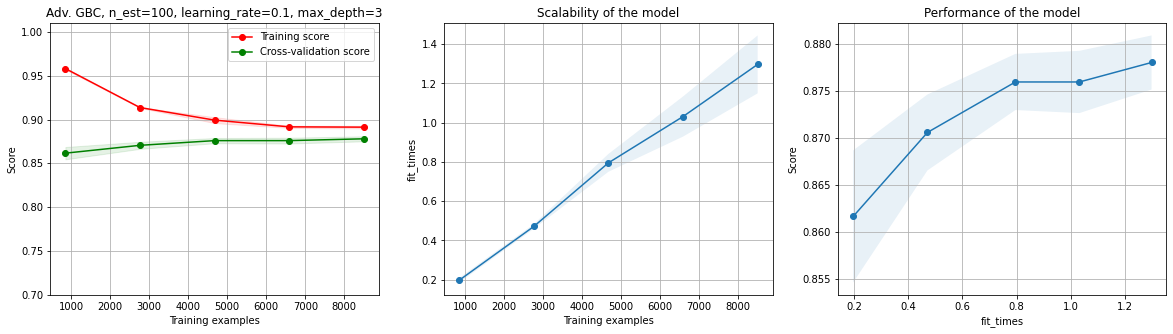

In [15]:
title = "Adv. GBC, n_est=100, learning_rate=0.1, max_depth=3"
plot_learning_curve(
    gbc_adv, title, X_train, y_train, ylim=(0.7, 1.01), cv=5, n_jobs=-1
)

plt.show()

In [147]:
y_pred_gbc_adv_train = cross_val_predict(gbc_adv, X_train, y_train, cv=5)
y_pred_gbc_adv_test = cross_val_predict(gbc_adv, X_test, y_test, cv=5)

accuracy_train = accuracy_score(y_train, y_pred_gbc_adv_train)
precision_train = precision_score(y_train, y_pred_gbc_adv_train)
recall_train = recall_score(y_train, y_pred_gbc_adv_train)
f1_train = f1_score(y_train, y_pred_gbc_adv_train)
roc_train = roc_auc_score(y_train, y_pred_gbc_adv_train)

accuracy_test = accuracy_score(y_test, y_pred_gbc_adv_test)
precision_test = precision_score(y_test, y_pred_gbc_adv_test)
recall_test = recall_score(y_test, y_pred_gbc_adv_test)
f1_test = f1_score(y_test, y_pred_gbc_adv_test)
roc_test = roc_auc_score(y_test, y_pred_gbc_adv_test)

print(f"Train Accuracy of Adv GBC: {accuracy_train:.3f}")
print(f"Train Precision of Adv GBC: {precision_train:.3f}")
print(f"Train Recall of Adv GBC: {recall_train:.3f}")
print(f"Train F1 of Adv GBC: {f1_train:.3f}")
print(f"Train ROC of Adv GBC: {roc_train:.3f}")
print("---")
print(f"Test Accuracy of Adv GBC: {accuracy_test:.3f}")
print(f"Test Precision of Adv GBC: {precision_test:.3f}")
print(f"Test Recall of Adv GBC: {recall_test:.3f}")
print(f"Test F1 of Adv GBC: {f1_test:.3f}")
print(f"Test ROC of Adv GBC: {roc_test:.3f}")

Train Accuracy of Adv GBC: 0.878
Train Precision of Adv GBC: 0.741
Train Recall of Adv GBC: 0.781
Train F1 of Adv GBC: 0.760
Train ROC of Adv GBC: 0.845
---
Test Accuracy of Adv GBC: 0.871
Test Precision of Adv GBC: 0.729
Test Recall of Adv GBC: 0.717
Test F1 of Adv GBC: 0.723
Test ROC of Adv GBC: 0.818


Final scores on test set

In [148]:
y_pred_base_gbc_train_f = gbc_base.predict(X_train)
y_pred_adv_gbc_train_f = gbc_adv.predict(X_train)

accuracy_base_train = accuracy_score(y_train, y_pred_base_gbc_train_f)
precision_base_train = precision_score(y_train, y_pred_base_gbc_train_f)
recall_base_train = recall_score(y_train, y_pred_base_gbc_train_f)
f1_base_train = f1_score(y_train, y_pred_base_gbc_train_f)
roc_base_train = roc_auc_score(y_train, y_pred_base_gbc_train_f)

accuracy_adv_train = accuracy_score(y_train, y_pred_adv_gbc_train_f)
precision_adv_train = precision_score(y_train, y_pred_adv_gbc_train_f)
recall_adv_train = recall_score(y_train, y_pred_adv_gbc_train_f)
f1_adv_train = f1_score(y_train, y_pred_adv_gbc_train_f)
roc_adv_train = roc_auc_score(y_train, y_pred_adv_gbc_train_f)

y_pred_base_gbc_test_f = gbc_base.predict(X_test)
y_pred_adv_gbc_test_f = gbc_adv.predict(X_test)

accuracy_base_test = accuracy_score(y_test, y_pred_base_gbc_test_f)
precision_base_test = precision_score(y_test, y_pred_base_gbc_test_f)
recall_base_test = recall_score(y_test, y_pred_base_gbc_test_f)
f1_base_test = f1_score(y_test, y_pred_base_gbc_test_f)
roc_base_test = roc_auc_score(y_test, y_pred_base_gbc_test_f)

accuracy_adv_test = accuracy_score(y_test, y_pred_adv_gbc_test_f)
precision_adv_test = precision_score(y_test, y_pred_adv_gbc_test_f)
recall_adv_test = recall_score(y_test, y_pred_adv_gbc_test_f)
f1_adv_test = f1_score(y_test, y_pred_adv_gbc_test_f)
roc_adv_test = roc_auc_score(y_test, y_pred_adv_gbc_test_f)

In [150]:
print("Final - Training Set Performance")
print(f"Train Accuracy of Base GBC: {accuracy_base_train:.3f}")
print(f"Train Precision of Base GBC: {precision_base_train:.3f}")
print(f"Train Recall of Base GBC: {recall_base_train:.3f}")
print(f"Train F1 of Base GBC: {f1_base_train:.3f}")
print(f"Train ROC of Base GBC: {roc_base_train:.3f}")
print("-")
print(f"Train Accuracy of Adv GBC: {accuracy_adv_train:.3f}")
print(f"Train Precision of Adv GBC: {precision_adv_train:.3f}")
print(f"Train Recall of Adv GBC: {recall_adv_train:.3f}")
print(f"Train F1 of Adv GBC: {f1_adv_train:.3f}")
print(f"Train ROC of Adv GBC: {roc_adv_train:.3f}")

print("---")

print(f"Test Accuracy of Base GBC: {accuracy_base_test:.3f}")
print(f"Test Precision of Base GBC: {precision_base_test:.3f}")
print(f"Test Recall of Base GBC: {recall_base_test:.3f}")
print(f"Test F1 of Base GBC: {f1_base_test:.3f}")
print(f"Test ROC of Base GBC: {roc_base_test:.3f}")
print("-")
print(f"Test Accuracy of Adv GBC: {accuracy_adv_test:.3f}")
print(f"Test Precision of Adv GBC: {precision_adv_test:.3f}")
print(f"Test Recall of Adv GBC: {recall_adv_test:.3f}")
print(f"Test F1 of Adv GBC: {f1_adv_test:.3f}")
print(f"Test ROC of Adv GBC: {roc_adv_test:.3f}")

Final - Training Set Performance
Train Accuracy of Base GBC: 0.918
Train Precision of Base GBC: 0.830
Train Recall of Base GBC: 0.841
Train F1 of Base GBC: 0.835
Train ROC of Base GBC: 0.892
-
Train Accuracy of Adv GBC: 0.890
Train Precision of Adv GBC: 0.766
Train Recall of Adv GBC: 0.803
Train F1 of Adv GBC: 0.784
Train ROC of Adv GBC: 0.861
---
Test Accuracy of Base GBC: 0.877
Test Precision of Base GBC: 0.734
Test Recall of Base GBC: 0.747
Test F1 of Base GBC: 0.740
Test ROC of Base GBC: 0.832
-
Test Accuracy of Adv GBC: 0.878
Test Precision of Adv GBC: 0.730
Test Recall of Adv GBC: 0.762
Test F1 of Adv GBC: 0.746
Test ROC of Adv GBC: 0.838


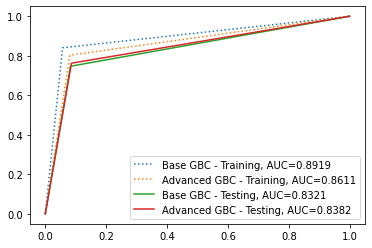

In [152]:
plt.figure(0).clf()

# Train
fpr, tpr, _ = roc_curve(y_train, y_pred_base_gbc_train_f)
auc = round(roc_auc_score(y_train, y_pred_base_gbc_train_f), 4)
plt.plot(fpr,tpr,label="Base GBC - Training, AUC="+str(auc), linestyle="dotted")

fpr, tpr, _ = roc_curve(y_train, y_pred_adv_gbc_train_f)
auc = round(roc_auc_score(y_train, y_pred_adv_gbc_train_f), 4)
plt.plot(fpr,tpr,label=f"Advanced GBC - Training, AUC="+str(auc), linestyle="dotted")
plt.legend()

# Test
fpr, tpr, _ = roc_curve(y_test, y_pred_base_gbc_test_f)
auc = round(roc_auc_score(y_test, y_pred_base_gbc_test_f), 4)
plt.plot(fpr,tpr,label="Base GBC - Testing, AUC="+str(auc), linestyle="solid")

fpr, tpr, _ = roc_curve(y_test, y_pred_adv_gbc_test_f)
auc = round(roc_auc_score(y_test, y_pred_adv_gbc_test_f), 4)
plt.plot(fpr,tpr,label=f"Advanced GBC - Testing, AUC="+str(auc), linestyle="solid")
plt.legend()